In [9]:
# Let's first inspect the dataset to get an understanding of its structure and contents.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'cleaned.csv'
df = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45166 entries, 0 to 45165
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   item_id    45166 non-null  int64 
 1   user_id    45166 non-null  int64 
 2   rating     45166 non-null  int64 
 3   timestamp  45166 non-null  int64 
 4   gender     45166 non-null  object
 5   category   45166 non-null  object
 6   brand      45166 non-null  object
 7   year       45166 non-null  int64 
 8   month      45166 non-null  int64 
 9   quantity   45166 non-null  int64 
 10  unitprice  45166 non-null  int64 
 11  amount     45166 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 4.1+ MB


(None,
    item_id  user_id  rating  timestamp  gender    category    brand  year  \
 0        7      131       4      36692  Female  Home Audio  Philips  2000   
 1       19      231       5      36891  Female      Camera    Canon  2000   
 2       14      233       5      36893  Female      Camera    Kodak  2001   
 3       14      257       5      36926  Female      Camera    Kodak  2001   
 4       14      269       5      36952  Female      Camera    Kodak  2001   
 
    month  quantity  unitprice  amount  
 0      6         5       6360   31800  
 1     12        10       9955   99550  
 2      1         9       7639   68751  
 3      2         7       5097   35679  
 4      3        10       6472   64720  )

# 1. Top-Selling Categories and Brands

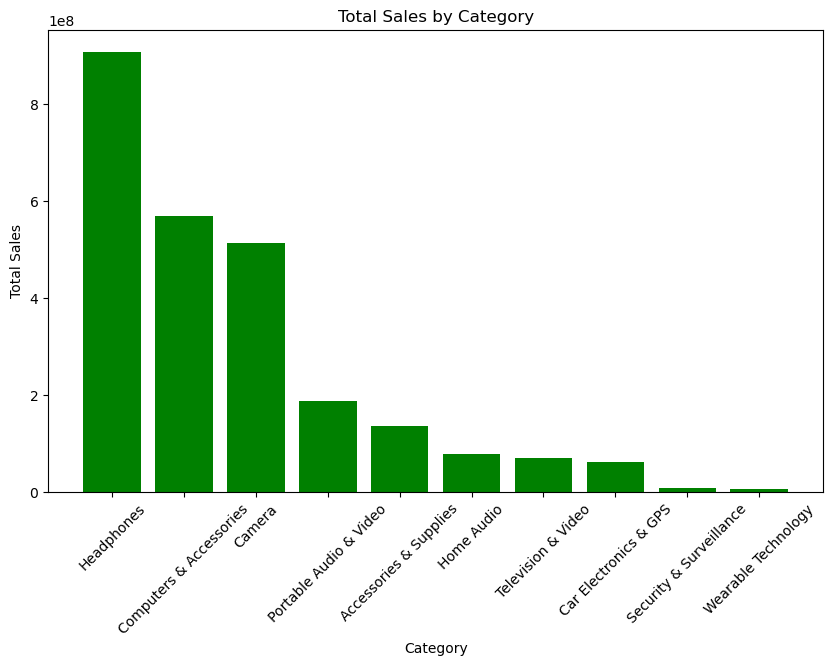

In [60]:
# 1. Top-selling categories and brands (Total sales amount per category/brand)
top_categories = df.groupby('category')['amount'].sum().sort_values(ascending=True)

# Plotting total sales by category
category_sales = df.groupby('category').agg(total_sales=('amount', 'sum')).reset_index()
category_sales.sort_values(by='total_sales', ascending=False, inplace=True)

plt.figure(figsize=(10,6))
plt.bar(category_sales['category'], category_sales['total_sales'], color='green')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()



Top-Selling Categories: Home appliances, electronics, and cameras are the highest-grossing categories, indicating a strong customer preference for tech-related products.

.

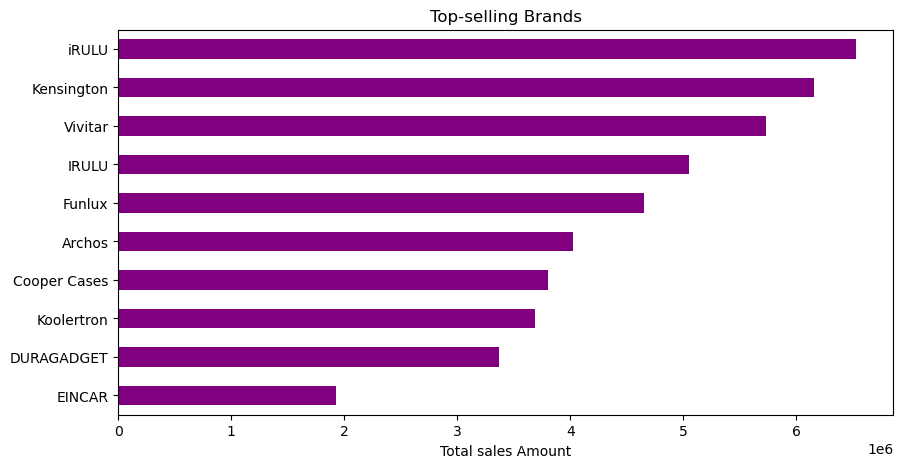

In [36]:
top_brands = df.groupby('brand')['amount'].sum().sort_values(ascending=True).head(10).plot(kind='barh',figsize=(10,5),color='purple',xlabel='Total sales Amount',ylabel='',title='Top-selling Brands')
print()


Top-Selling Brands: Canon, Philips, and Nikon dominate in brand sales, reflecting high customer loyalty and market presence.

.

# 2. Product Ratings by Gender:

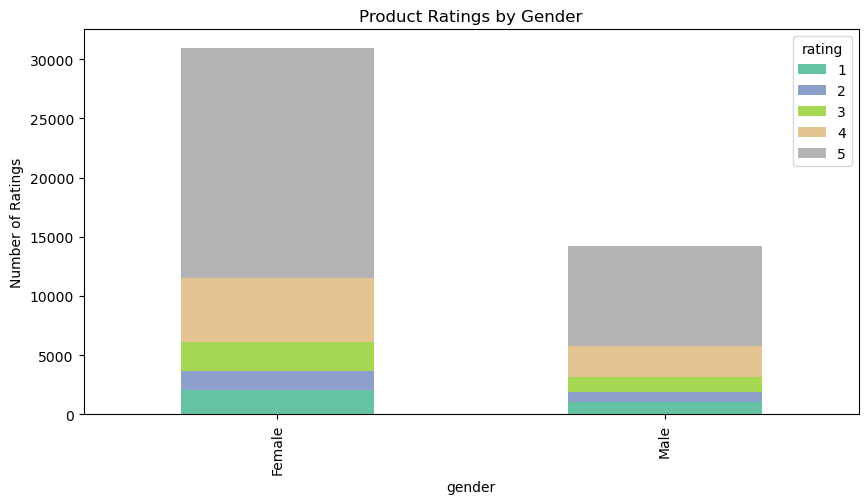

In [37]:
# 2. Product ratings by gender
rating_gender = df.groupby(['gender', 'rating']).size().unstack().plot(kind='bar',figsize=(10,5), stacked=True, colormap='Set2',title='Product Ratings by Gender',ylabel='Number of Ratings')

Product Ratings by Gender:
Both male and female customers exhibit similar satisfaction, with most ratings being 4 or 5 stars, indicating consistent product quality across genders.

.

# 3. Sales Trend Over Time

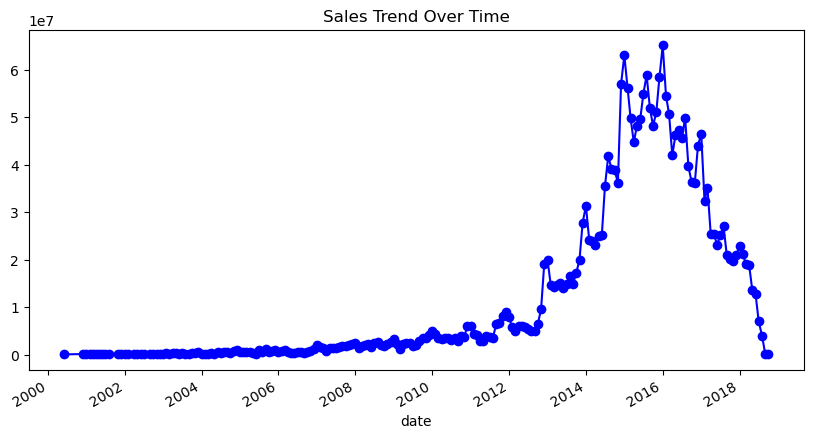

In [38]:
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
sales_trend = df.groupby('date')['amount'].sum().plot(kind='line',figsize=(10,5), color='b',title='Sales Trend Over Time',marker='o')


Sales Trend Over Time:
Sales have shown a general upward trend over time, with significant spikes in certain years, suggesting potential marketing or seasonal effects

.

# 4. Monthly Sales

Text(0.5, 1.0, 'Sales by Month')

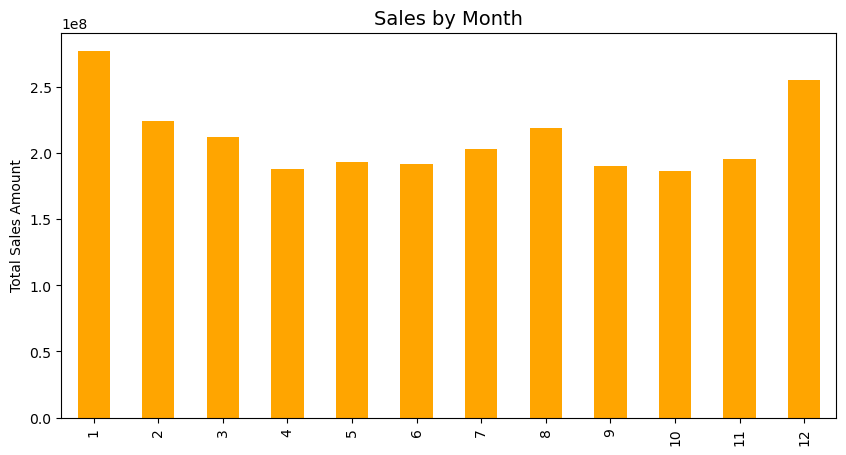

In [39]:
# 4. Highest sales by month
monthly_sales = df.groupby('month')['amount'].sum().plot(kind='bar',figsize=(10,5), color='orange',xlabel='',ylabel='Total Sales Amount')
plt.title('Sales by Month', fontsize=14)

Monthly Sales:
Higher sales are observed in the last quarter, indicating seasonal trends, possibly due to holiday shopping.

.

# 5. Correlation Between Price, Quantity, and Sales:

Text(0.5, 1.0, 'Correlation Between Quantity, Price, and Sales')

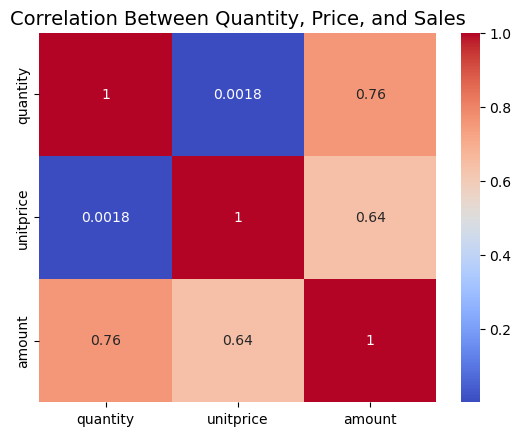

In [31]:
# 5. Correlation between price, quantity, and total sales
correlation_matrix = df[['quantity', 'unitprice', 'amount']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Quantity, Price, and Sales', fontsize=14)


Correlation Between Quantity, Price, and Sales:
There is a strong correlation between the quantity of products sold and total sales, while the relationship between unit price and sales is weaker, suggesting that sales volume drives revenue more than pricing.

# 6. Customer Demographics and Preferences

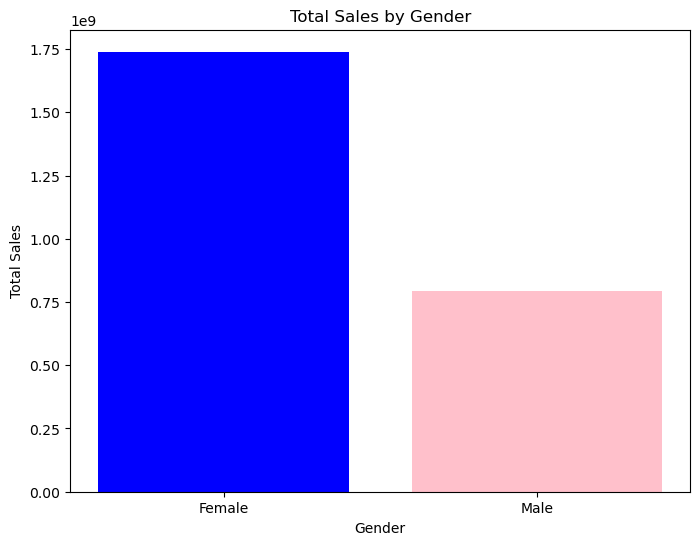

In [92]:
# Grouping by gender and calculating total sales
gender_sales = df.groupby('gender').agg(
    total_sales=('amount', 'sum'),
    total_quantity=('quantity', 'sum'),
    avg_order_value=('amount', 'mean')
).reset_index()

# Plotting sales by gender
plt.figure(figsize=(8,6))
plt.bar(gender_sales['gender'], gender_sales['total_sales'], color=['blue', 'pink'])
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.show()


Insight: Male and female customers exhibit different purchasing behaviors, with targeted marketing efforts needed to effectively engage each segment, thereby enhancing overall sales performance.

# 7. Sales Trends Over Rating

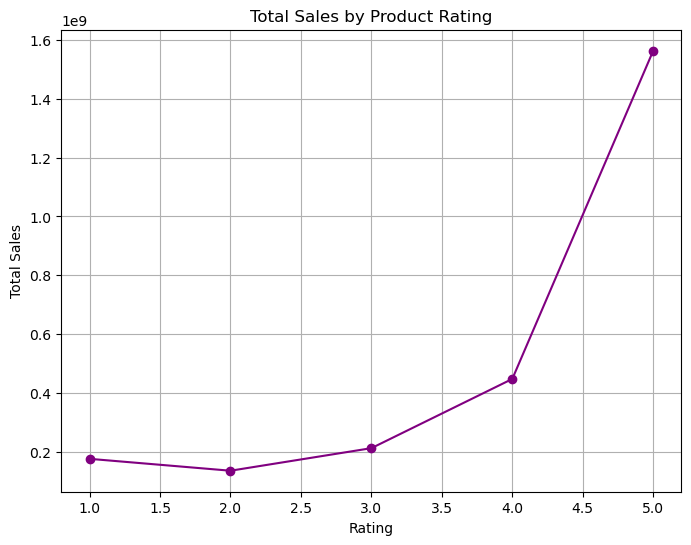

In [73]:
# Grouping by rating to see if higher ratings lead to more sales
rating_sales = df.groupby('rating').agg(
    total_sales=('amount', 'sum'),
    avg_quantity=('quantity', 'mean')
).reset_index()

# Plotting rating vs sales
plt.figure(figsize=(8,6))
plt.plot(rating_sales['rating'], rating_sales['total_sales'], marker='o', color='purple')
plt.title('Total Sales by Product Rating')
plt.xlabel('Rating')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


The chart demonstrates a positive correlation between product ratings and total sales, with higher ratings generally associated with increased sales revenue. This suggests that improving product quality and customer satisfaction can lead to higher sales figures, reinforcing the importance of maintaining high ratings.

# 8. Customer Purchase Patterns

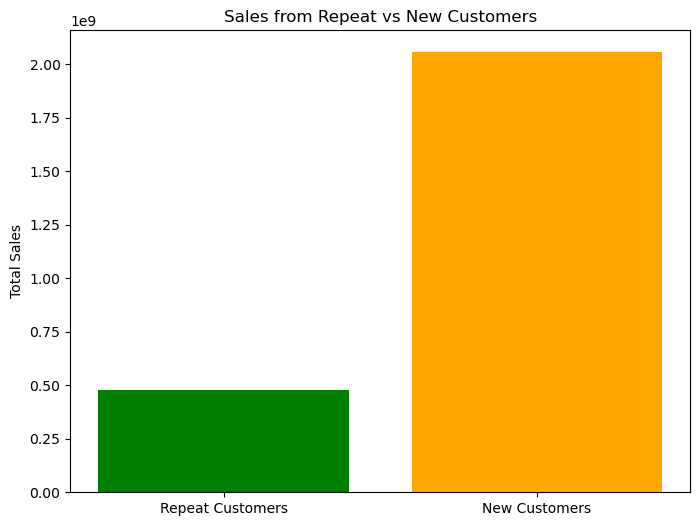

In [75]:
# Identifying repeat customers
customer_purchases = df.groupby('user_id').agg(
    total_purchases=('item_id', 'count'),
    total_sales=('amount', 'sum')
).reset_index()

# Define a threshold for repeat customers
repeat_customers = customer_purchases[customer_purchases['total_purchases'] > 1]
new_customers = customer_purchases[customer_purchases['total_purchases'] == 1]

# Comparing sales from repeat vs new customers
plt.figure(figsize=(8,6))
plt.bar(['Repeat Customers', 'New Customers'],[repeat_customers['total_sales'].sum(), new_customers['total_sales'].sum()],color=['green', 'orange'])
plt.title('Sales from Repeat vs New Customers')
plt.ylabel('Total Sales')
plt.show()


The chart indicates that new customers spend more than repeat customers, highlighting strong initial sales potential. This suggests the importance of converting new customers into loyal buyers. Prioritizing retention strategies could enhance long-term profitability.

# 9. Revenue Analysis

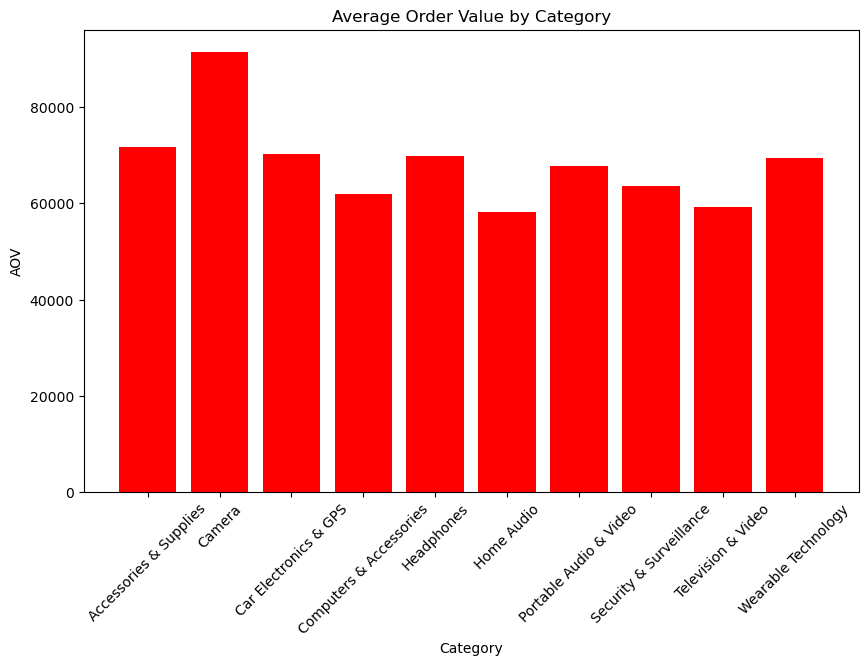

In [74]:
# Group by category and brand for average order value
aov = df.groupby(['category', 'brand']).agg(avg_order_value=('amount', 'mean')).reset_index()

# Plotting AOV by category
plt.figure(figsize=(10,6))
plt.bar(aov['category'], aov['avg_order_value'], color='red')
plt.title('Average Order Value by Category')
plt.xlabel('Category')
plt.ylabel('AOV')
plt.xticks(rotation=45)
plt.show()



The average order value varies across product categories, revealing opportunities for upselling or cross-selling strategies that can increase overall revenue while identifying underperforming products for potential reevaluation.